In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [101]:
%cd '/gdrive/My Drive/Global_AI_Hub'

/gdrive/My Drive/Global_AI_Hub


In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import cv2
import pickle

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [104]:
X_train = pickle.load(open('X_train.pkl', 'rb'))
y_train = pickle.load(open('y_train.pkl', 'rb'))

X_val = pickle.load(open('X_val.pkl', 'rb'))
y_val = pickle.load(open('y_val.pkl', 'rb'))

X_test = pickle.load(open('X_test.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))

In [6]:
y_train

array([0, 0, 1, ..., 1, 1, 0])

In [105]:
from keras.applications.vgg19 import VGG19

In [106]:
# VGG19 görselleri 48x48 kabul etmektedir
vgg = VGG19(include_top = False, weights = "imagenet", input_shape = (48,48,3))
print(vgg.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [107]:
vgg_layer_list = vgg.layers
model = Sequential()
for layer in vgg_layer_list:
    model.add(layer)
for layer in model.layers:
    # Burada False yapmamızın nedeni diğer katmanları eğitmeyecek olmamızdır.
    layer.trainable = False
# fully con layers
model.add(Flatten())
model.add(Dense(128))
# 1 tane output beklentimiz var o yüzden değeri 1 ve binary olduğu için sigmoid kullanılmıştır
model.add(Dense(1, activation= "sigmoid"))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)      

In [108]:
model.compile(loss = "binary_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [109]:
# Aşağıdaki işlemler için shapei değiştirilmiştir
y_train = y_train.reshape((-1,1))
y_val = y_val.reshape((-1,1))

In [110]:
X_train = X_train.reshape(-1, 48, 48, 3)
X_val = X_val.reshape(-1, 48, 48, 3)

In [111]:
X_train.shape, y_train.shape

((14979, 48, 48, 3), (14979, 1))

In [113]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   zoom_range=0.3, 
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(X_train, y_train, batch_size=30)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=20)
test_generator = validation_datagen.flow(X_test, y_test, batch_size=20)

In [115]:
hist = model.fit_generator(train_generator, steps_per_epoch=100, epochs= 100, 
                           validation_data=validation_generator, validation_steps= 50)
   

Epoch 1/100
100/100 [==============================] - 4s 41ms/step - loss: 0.6704 - accuracy: 0.6107 - val_loss: 0.5576 - val_accuracy: 0.7040
Epoch 2/100
100/100 [==============================] - 4s 41ms/step - loss: 0.6510 - accuracy: 0.6373 - val_loss: 0.5587 - val_accuracy: 0.6980
Epoch 3/100
100/100 [==============================] - 4s 40ms/step - loss: 0.6376 - accuracy: 0.6391 - val_loss: 0.5998 - val_accuracy: 0.6610
Epoch 4/100
100/100 [==============================] - 4s 41ms/step - loss: 0.6400 - accuracy: 0.6459 - val_loss: 0.5713 - val_accuracy: 0.7040
Epoch 5/100
100/100 [==============================] - 6s 60ms/step - loss: 0.6172 - accuracy: 0.6677 - val_loss: 0.5684 - val_accuracy: 0.7030
Epoch 6/100
100/100 [==============================] - 4s 41ms/step - loss: 0.6207 - accuracy: 0.6423 - val_loss: 0.5841 - val_accuracy: 0.6990
Epoch 7/100
100/100 [==============================] - 4s 40ms/step - loss: 0.6211 - accuracy: 0.6490 - val_loss: 0.5904 - val_accuracy:

In [116]:
model.save_weights("transfer_lear_vgg16.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


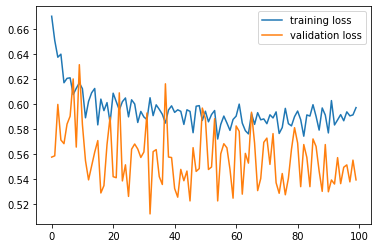

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [117]:
# evaluation
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.legend()
plt.show()
plt.figure()


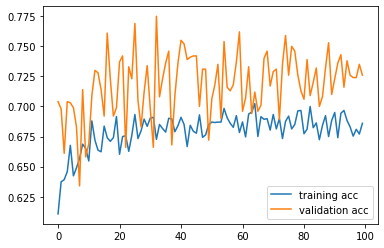

In [118]:
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.legend()
plt.show()

In [119]:
# save history
import json, codecs
with open("model_history.json","w") as f:
    json.dump(hist.history,f)

In [120]:
# load history
with codecs.open("model_history.json","r",encoding = "utf-8") as f:
    m_history = json.loads(f.read())

In [121]:
model.metrics_names

['loss', 'accuracy']

In [122]:
results = model.evaluate(X_test, y_test)

157/157 [==============================] - 3s 17ms/step - loss: 15.4381 - accuracy: 0.6635


In [123]:
print("Test Loss: {:.2f}".format(results[0]))
print("Test Accuracy: {:.2f}".format(results[1] * 100))

Test Loss: 15.44
Test Accuracy: 66.35


In [124]:
X_test = X_test/255
predict = model.predict(X_test)
predict = np.round(predict)

In [125]:
y_test[660], predict[660]

(0, array([0.], dtype=float32))

In [127]:
y_test = y_test.reshape((-1,1))

In [128]:
y_test.shape, predict.shape

((4993, 1), (4993, 1))

In [130]:
y_test[660], predict[660]

(array([0]), array([0.], dtype=float32))

              precision    recall  f1-score   support

           0       0.78      0.61      0.69      2483
           1       0.68      0.83      0.75      2510

    accuracy                           0.72      4993
   macro avg       0.73      0.72      0.72      4993
weighted avg       0.73      0.72      0.72      4993



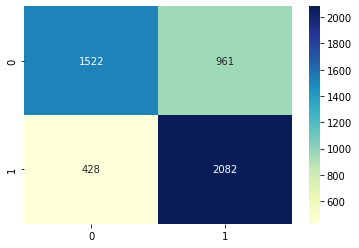

In [131]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, predict, target_names=['0', '1'])
conf_mat = confusion_matrix(y_test, predict)

print(report)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.show()